In [7]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import zipfile

import os
from sklearn.model_selection import train_test_split 

for dirname, _, filenames in os.walk('dataset.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [8]:
df = pd.read_csv('dataset.csv')
print(f'data shape is {df.shape}')
df.head(5)

data shape is (50, 7)


,Назва,Кількість спеціалістів 2023,Кількість технічних спеціалістів 2023,Зміна загальної кількості в порівнянні з 2022,% технічних,% зростання,Розташування головного офісу в Україні(де працює більше людей)
0,Epam,10230,9300,-1145,0.909091,-0.111926,Київ
1,SoftServe,8326,6356,-1124,0.763392,-0.134999,Київ
2,GlobalLogic,6560,6140,-375,0.935976,-0.057165,Київ
3,Evoplay,4011,2337,-200,0.582648,-0.049863,Київ
4,Luxoft,3700,3000,-100,0.810811,-0.027027,Київ


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Назва                                                           50 non-null     object 
 1   Кількість спеціалістів 2023                                     50 non-null     int64  
 2   Кількість технічних спеціалістів 2023                           50 non-null     int64  
 3   Зміна загальної кількості в порівнянні з 2022                   50 non-null     int64  
 4   % технічних                                                     50 non-null     float64
 5   % зростання                                                     50 non-null     float64
 6   Розташування головного офісу в Україні(де працює більше людей)  50 non-null     object 
dtypes: float64(2), int64(3), object(2)
memory usage: 2.9+ KB

In [10]:
df.isnull().sum()

Назва                                                             0
Кількість спеціалістів 2023                                       0
Кількість технічних спеціалістів 2023                             0
Зміна загальної кількості в порівнянні з 2022                     0
% технічних                                                       0
% зростання                                                       0
Розташування головного офісу в Україні(де працює більше людей)    0
dtype: int64

In [11]:
df.dtypes

Назва                                                              object
Кількість спеціалістів 2023                                         int64
Кількість технічних спеціалістів 2023                               int64
Зміна загальної кількості в порівнянні з 2022                       int64
% технічних                                                       float64
% зростання                                                       float64
Розташування головного офісу в Україні(де працює більше людей)     object
dtype: object

In [12]:
df.describe()

,Кількість спеціалістів 2023,Кількість технічних спеціалістів 2023,Зміна загальної кількості в порівнянні з 2022,% технічних,% зростання
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1725.080000,1338.780000,-124.240000,0.751699,-0.069460
std,1917.107748,1676.596361,269.083293,0.205370,0.178582
min,617.000000,161.000000,-1145.000000,0.248375,-1.077333
25%,771.750000,572.500000,-150.750000,0.682771,-0.098305
50%,956.000000,765.000000,-51.000000,0.823940,-0.048741
75%,1886.500000,1390.500000,10.000000,0.898306,0.011387
max,10230.000000,9300.000000,216.000000,0.975000,0.258683


In [15]:
#encoding main office location
from sklearn import preprocessing
df2 = df.copy()
df2['Розташування головного офісу в Україні(де працює більше людей)'] = preprocessing.LabelEncoder().fit_transform(df2['Розташування головного офісу в Україні(де працює більше людей)'])
df2.head(5)

,Назва,Кількість спеціалістів 2023,Кількість технічних спеціалістів 2023,Зміна загальної кількості в порівнянні з 2022,% технічних,% зростання,Розташування головного офісу в Україні(де працює більше людей)
0,Epam,10230,9300,-1145,0.909091,-0.111926,1
1,SoftServe,8326,6356,-1124,0.763392,-0.134999,1
2,GlobalLogic,6560,6140,-375,0.935976,-0.057165,1
3,Evoplay,4011,2337,-200,0.582648,-0.049863,1
4,Luxoft,3700,3000,-100,0.810811,-0.027027,1


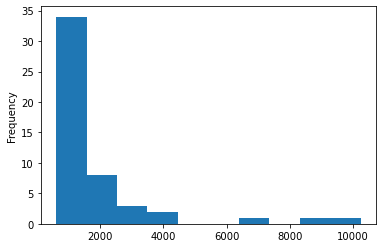

In [16]:
df2['Кількість спеціалістів 2023'].plot(kind = 'hist')

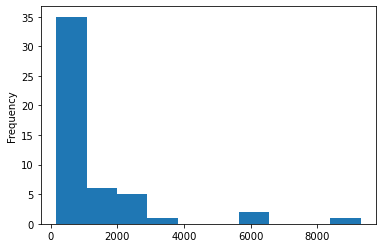

In [17]:
df2['Кількість технічних спеціалістів 2023'].plot(kind = 'hist')

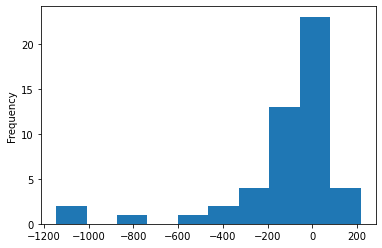

In [18]:
df2['Зміна загальної кількості в порівнянні з 2022'].plot(kind = 'hist')

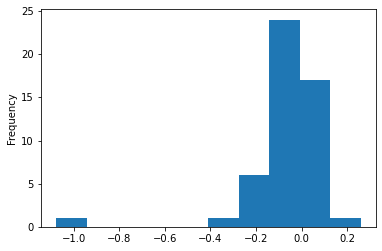

In [19]:
df2['% зростання'].plot(kind = 'hist')

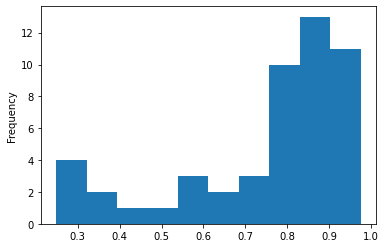

In [20]:
df2['% технічних'].plot(kind = 'hist')

In [21]:
df2.to_csv('prepared_data.csv', sep=',', index=False)

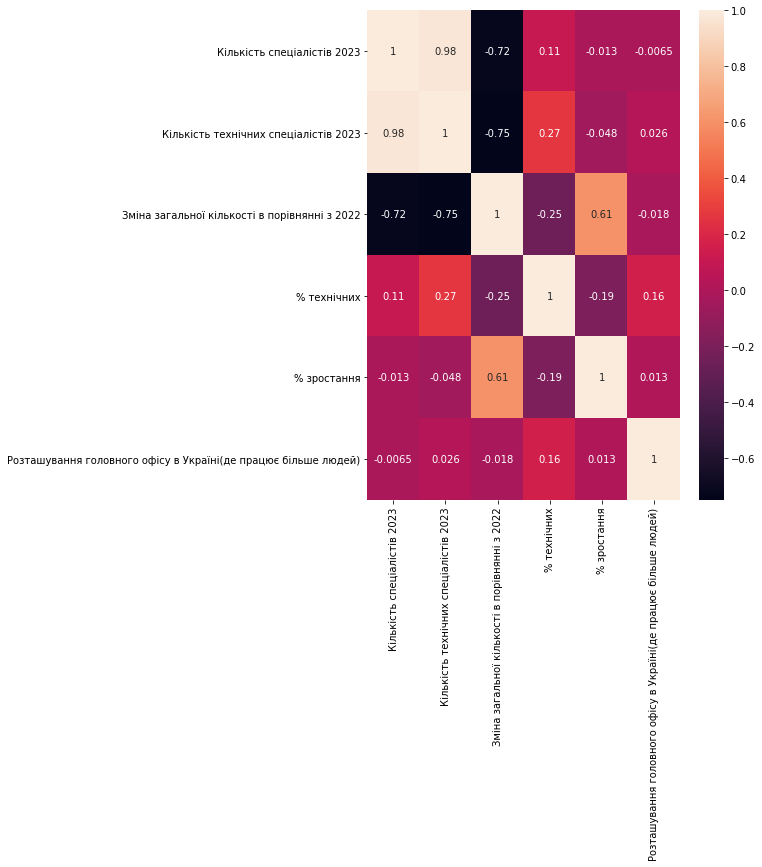

In [24]:
#correlation
df3 = df2.copy()
import seaborn as sns
corrmat = df3.corr()
f, ax = plt.subplots(figsize=(7, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

In [26]:
#We see that biggest correlation between кстю спец у 2023 та зміною кількості у порівнянні з 2022

In [27]:
#Let's do linear regression


In [29]:
df3.head(10)

,Назва,Кількість спеціалістів 2023,Кількість технічних спеціалістів 2023,Зміна загальної кількості в порівнянні з 2022,% технічних,% зростання,Розташування головного офісу в Україні(де працює більше людей)
0,Epam,10230,9300,-1145,0.909091,-0.111926,1
1,SoftServe,8326,6356,-1124,0.763392,-0.134999,1
2,GlobalLogic,6560,6140,-375,0.935976,-0.057165,1
3,Evoplay,4011,2337,-200,0.582648,-0.049863,1
4,Luxoft,3700,3000,-100,0.810811,-0.027027,1
5,Ajax Systems,2899,818,119,0.282166,0.041049,1
6,Ciklum,2650,2310,-152,0.871698,-0.057358,1
7,Intellias,2560,2065,-143,0.806641,-0.055859,1
8,DataArt,2500,2150,-250,0.860000,-0.100000,1
9,ZONE3000,2375,2232,32,0.939789,0.013474,3


In [40]:
X = df3.iloc[:, [False,False,True,True,True,True,True]]
y = df3['Кількість спеціалістів 2023']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X

,Кількість технічних спеціалістів 2023,Зміна загальної кількості в порівнянні з 2022,% технічних,% зростання,Розташування головного офісу в Україні(де працює більше людей)
0,9300,-1145,0.909091,-0.111926,1
1,6356,-1124,0.763392,-0.134999,1
2,6140,-375,0.935976,-0.057165,1
3,2337,-200,0.582648,-0.049863,1
4,3000,-100,0.810811,-0.027027,1
5,818,119,0.282166,0.041049,1
6,2310,-152,0.871698,-0.057358,1
7,2065,-143,0.806641,-0.055859,1
8,2150,-250,0.860000,-0.100000,1
9,2232,32,0.939789,0.013474,3


In [31]:
#Previously we got that the biggest correlation is between кстю спец у 2023 та зміною кількості у порівнянні з 2022. Let's make one-factor model

In [41]:
f1 = ['Зміна загальної кількості в порівнянні з 2022']

from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[f1], y_train)

sr.coef_, sr.intercept_

(array([-5.13829745]), 1054.5091025683007)

In [33]:
#Загальна кількість=-5.13829745*(Зміна загальної кількості в порівнянні з 2022)+1054.5091025683007

In [42]:
y_pred = sr.predict(X_test[f1])
sr.score(X_train[f1], y_train).round(3), sr.score(X_test[f1], y_test).round(3)

(0.529, 0.361)

In [35]:
#Зміна загальної кількості в порівнянні з 2022 makes 44,5% зміни of Загальна кількість

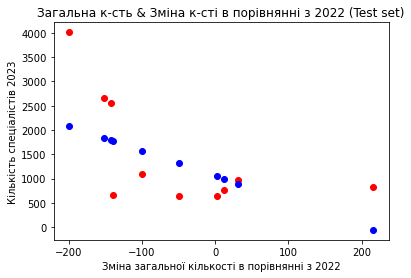

In [43]:
plt.scatter(X_test['Зміна загальної кількості в порівнянні з 2022'], y_test, color = 'red')
plt.plot(X_test['Зміна загальної кількості в порівнянні з 2022'], sr.predict(X_test[f1]), 'bo')
plt.title('Загальна к-сть & Зміна к-сті в порівнянні з 2022 (Test set)')
plt.xlabel('Зміна загальної кількості в порівнянні з 2022')
plt.ylabel('Кількість спеціалістів 2023')
plt.show()

In [37]:
#Here we see that difference increases as the зміна к-сті зменшується у від'ємну сторону.

In [38]:
#Multiple Linear Regression

In [44]:
mr = LinearRegression().fit(X_train, y_train)
mr.score(X_train, y_train).round(3)

0.983

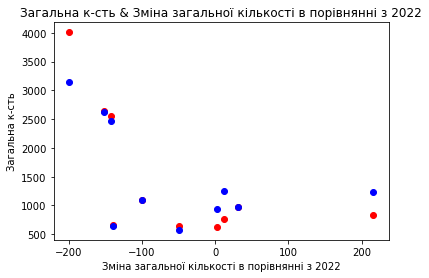

In [45]:
# Visualising the Test set results
plt.scatter(X_test['Зміна загальної кількості в порівнянні з 2022'], y_test, color = 'red')
plt.plot(X_test['Зміна загальної кількості в порівнянні з 2022'], mr.predict(X_test), 'bo')
plt.title('Загальна к-сть & Зміна загальної кількості в порівнянні з 2022')
plt.xlabel('Зміна загальної кількості в порівнянні з 2022')
plt.ylabel('Загальна к-сть')
plt.show()